<a href="https://colab.research.google.com/github/FranziskoB/Regressao_simples_multipla/blob/main/04_Regress%C3%A3o_nao_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELAGEM DE UMA REGRESSÃO NÃO LINEAR SIMPLES

## Bibliotecas

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox 
import plotly.graph_objects as go

## Importando os dados

In [ ]:
bebes = pd.read_csv('https://github.com/FranziskoB/Regressao_simples_multipla/raw/main/dados/bebes.csv')

In [ ]:
bebes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [ ]:
bebes.head(5)

,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25


In [ ]:
bebes.describe()

,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


In [ ]:
import plotly.express as px
fig = px.scatter(bebes, x="idade", y="comprimento")
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    title_text='Gráfico de crescimento de bebês',
    xaxis_title='Idade em  anos',
    yaxis_title='Comprimento em cm',
)
fig.show()

## Comparando a regressão linear com a regressão não linear

[(10.0, 100.0)]

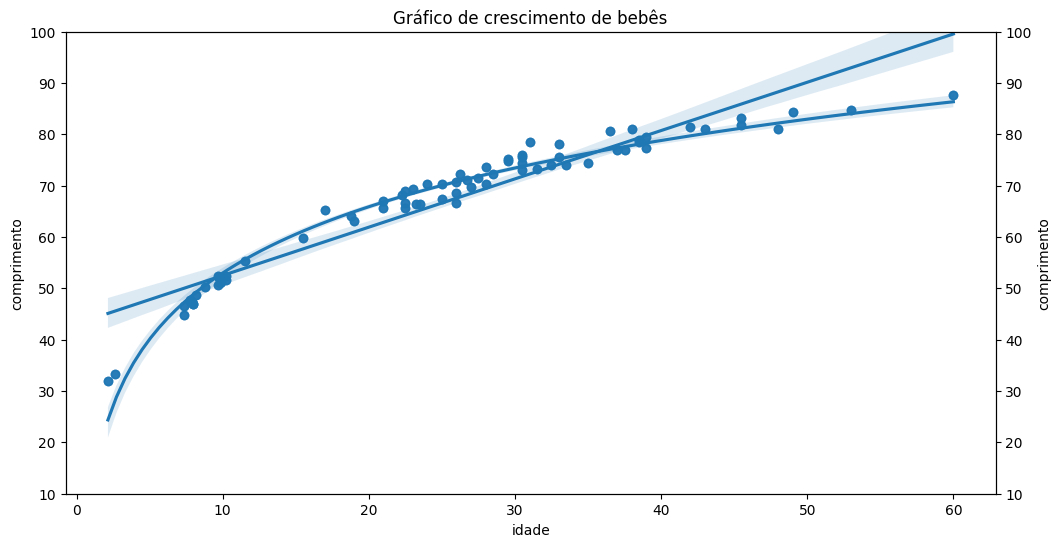

In [ ]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.regplot(x="idade", y="comprimento", data=bebes,ax=ax1)
ax2 = ax1.twinx()
sns.regplot(x="idade", y="comprimento", data=bebes,logx=True,ax=ax2)
ax1.set_title('Gráfico de crescimento de bebês')
ax1.set(ylim=(10, 100))
ax2.set(ylim=(10, 100))

Visualmente o método de regressão não linear tem melhor ajuste 


## Teste de verificação da aderência dos resíduos à normalidade 

### Estimando o modelo linear

In [ ]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(bebes.comprimento)
Y_sm=bebes.idade
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(Y_sm, X_sm).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
bebes['yhat']=results.predict(X_sm)
bebes['erro']=bebes['yhat']-bebes['idade']

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  idade   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.72e-38
Time:                        21:59:57   Log-Likelihood:                -207.97
No. Observations:                  74   AIC:                             419.9
Df Residuals:                      72   BIC:                             424.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -38.8767      2.529    -15.373      0.000     -43.918     -33.836
comprimento     0.9592      0.037     25.841      0.000       0.885       1.033
==============================================================================
Omnibus:                       24.863   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.471
Skew:                           1.363   Prob(JB):                     7.30e-09
Kurtosis:                       5.174   Cond. No.                         364.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### QQ plot

O gráfico QQ (quantil-quantil) é um gráfico de probabilidade, que é um método gráfico para comparar duas distribuições de probabilidade plotando seus quantis um contra o outro. Nesse caso, a linha é a distribuição teórica (normal) e os pontos são referentes a distribuição encontrada dos resíduos.

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



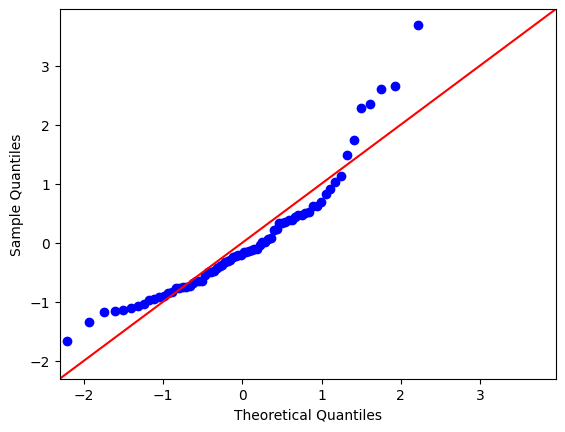

In [ ]:
res = results.resid
fig = sm.qqplot(res, stats.norm, fit=True, line="45")
plt.show()

### Histograma

Outra possível estratégia é plotar o histograma dos resíduos e verificar “no olho” se a sua distribuição se aproxima da normal.

[]

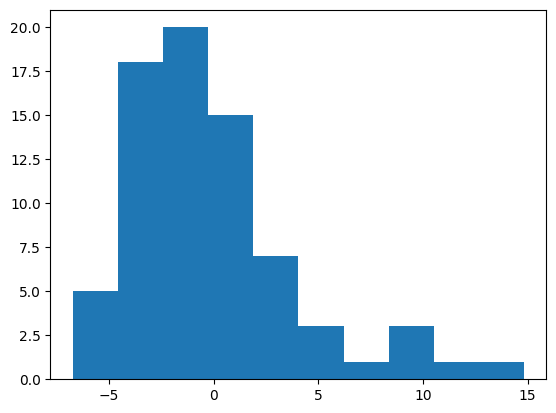

In [ ]:
plt.hist(res)
plt.plot()

### Teste Shapiro-Francia

In [ ]:
shapiro_test = stats.shapiro(res)

In [ ]:
shapiro_test

ShapiroResult(statistic=0.8960091471672058, pvalue=1.673914448474534e-05)

P_valor<0.05

## Transformação de box cox

Calculando o melhor lambda

In [ ]:
transformed_data, best_lambda = boxcox(bebes.comprimento)

In [ ]:
bebes['comprimento_bc']=transformed_data # inserindo na base de dados os valores com o lambda aplicado

In [ ]:
bebes.head(5)

,comprimento,idade,yhat,erro,comprimento_bc,yhat_bc,erro_bc
34,31.90,2.15,-8.279340,-10.429340,3748.743458,-0.303799,-2.453799
35,33.37,2.60,-6.869368,-9.469368,4225.872233,0.180767,-2.419233
36,44.73,7.35,4.026743,-3.323257,9210.475844,5.243060,-2.106940
37,46.57,7.35,5.791606,-1.558394,10252.665241,6.301493,-1.048507
41,46.93,8.00,6.136905,-1.863095,10464.772888,6.516907,-1.483093


### Estimando um novo modelo

In [ ]:
# é necessário adicionar uma constante a matriz X
X_sm_bc = sm.add_constant(bebes.comprimento_bc)
Y_sm_bc = bebes.idade
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results_bc = sm.OLS(Y_sm_bc, X_sm_bc).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
bebes['yhat_bc']=results_bc.predict(X_sm_bc)
bebes['erro_bc']=bebes['yhat_bc']-bebes['idade']

In [ ]:
bebes.head(5)

,comprimento,idade,yhat,erro,comprimento_bc,yhat_bc,erro_bc
34,31.90,2.15,-8.279340,-10.429340,3748.743458,-0.303799,-2.453799
35,33.37,2.60,-6.869368,-9.469368,4225.872233,0.180766,-2.419234
36,44.73,7.35,4.026743,-3.323257,9210.475844,5.243060,-2.106940
37,46.57,7.35,5.791606,-1.558394,10252.665241,6.301493,-1.048507
41,46.93,8.00,6.136905,-1.863095,10464.772888,6.516907,-1.483093


In [ ]:
# mostrando as estatísticas do modelo
results_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  idade   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           7.16e-53
Time:                        22:00:15   Log-Likelihood:                -173.17
No. Observations:                  74   AIC:                             350.3
Df Residuals:                      72   BIC:                             355.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.1110      0.750     -5.480      0.000      -5.606      -2.616
comprimento_bc     0.0010   2.38e-05     42.689      0.000       0.001       0.001
==============================================================================
Omnibus:                        5.304   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.668
Skew:                           0.319   Prob(JB):                       0.0588
Kurtosis:                       4.196   Cond. No.                     7.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O modelo Box cox apresentou apresentou R² = 0.961, resultado melhor que o modelo obtido apartir da regressão linear que se obteve R² = 0.903

## Comparação gráfica entre os dois modelos estimados

In [ ]:
bebes=bebes.sort_values(by='comprimento')
fig = go.Figure()
fig.add_trace(go.Scatter(x=bebes['comprimento'], y=bebes['yhat'],
                    mode='lines',
                    name='linear'))
fig.add_trace(go.Scatter(x=bebes['comprimento'], y=bebes['yhat_bc'],
                    mode='lines',
                    name='Box cox'))
fig.add_trace(go.Scatter(x=bebes['comprimento'], y=bebes['idade'],
                    mode='markers', name='Amostras'))
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    title_text='Gráfico de crescimento de bebês',
    xaxis_title='Idade em  anos',
    yaxis_title='Comprimento em cm',
)
fig.show()